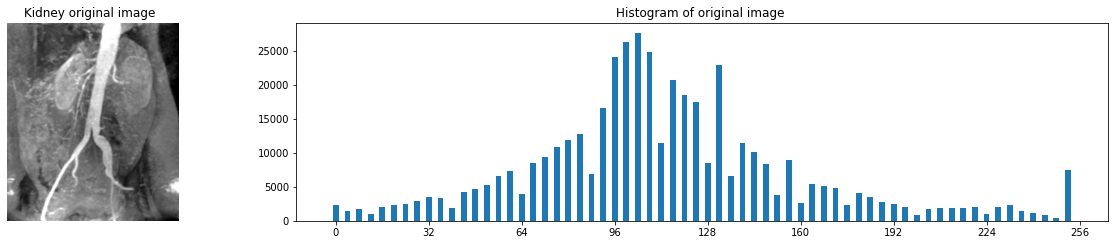

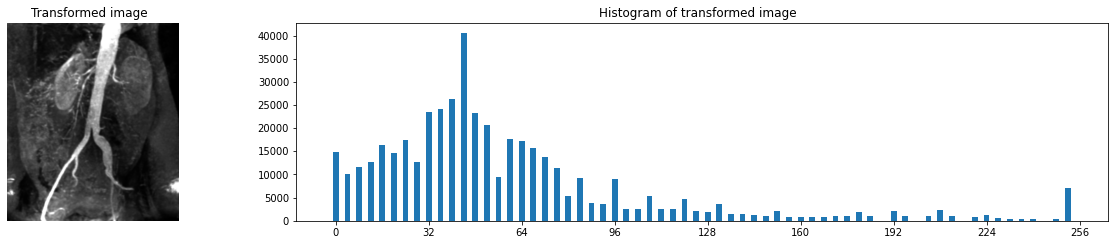

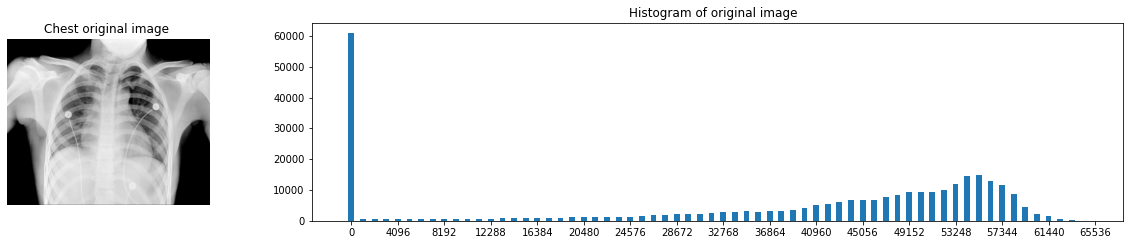

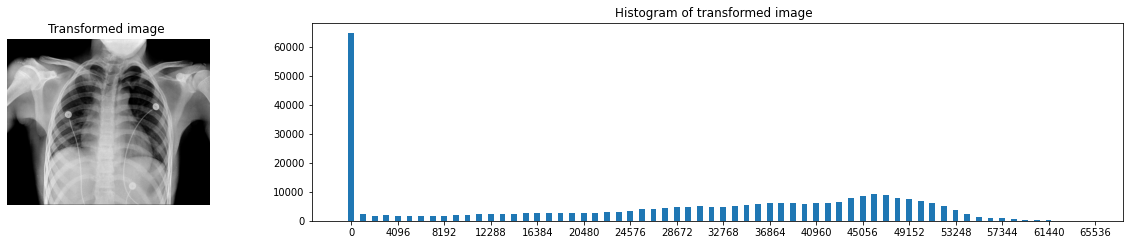

Text(0.5, 1.0, ' Figure 3.3 ')

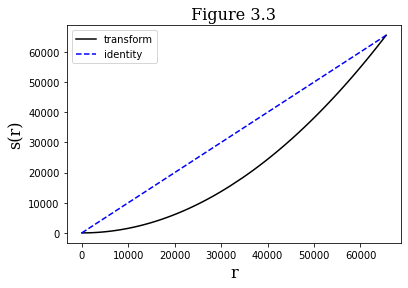

In [2]:
# -*- coding: utf-8 -*-
"""q3-hw2-dip.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1tux8qOMsYPAc-bDnTZJ-2TMbMDUjzZXB
"""

import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib import gridspec

#  B) --------------------------------
def transform(img, bd):
  L = 2**bd    # a = 1/L
  result = np.zeros(img.shape)
    
  if(len(img.shape) == 2):
    a = img[0][0].dtype
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            result[i][j] = np.round((img[i][j] + img[i][j]**2)/L)

                
  else:
    a = img[0][0][0].dtype
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                result[i][j][k] =np.round( (img[i][j][k] + img[i][j][k]**2)/L)

  return result.astype(a)

#  C) --------------------------------
kidney = cv2.imread('/content/kidney.tif')
newKidney = transform(kidney , 8)

plt.figure(figsize=(20,8))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 4])


plt.subplot(gs[0])
plt.title('Kidney original image  ')
plt.imshow(kidney)
plt.axis('off')

plt.subplot(gs[1])
bins = np.arange(0, 257,4)
xTicks = np.arange(0, 257,32)
plt.title('Histogram of original image ')
plt.hist(kidney.ravel(),bins,rwidth=0.5, align='left')
plt.xticks(xTicks)
plt.show()

plt.figure(figsize=(20,8))

plt.subplot(gs[2])
plt.title('Transformed image  ')
plt.imshow(newKidney)
plt.axis('off')

plt.subplot(gs[3])
plt.title('Histogram of transformed image  ')
plt.hist(newKidney.ravel(),bins,rwidth=0.5, align='left')
plt.xticks(xTicks)
plt.show()


chest = cv2.imread('/content/chest.tif',cv2.IMREAD_ANYDEPTH )
newChest = transform(chest , 16)

plt.figure(figsize=(20,8))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 4])

plt.subplot(gs[0])
plt.title('Chest original image ')
plt.imshow(chest, cmap = 'gray')
plt.axis('off')

plt.subplot(gs[1])
bins = np.arange(0, 65537,1024)
xTicks = np.arange(0, 65537,4096)
plt.title('Histogram of original image  ')
plt.hist(chest.ravel(),bins,rwidth=0.5, align='left')
plt.xticks(xTicks)
plt.show()

plt.figure(figsize=(20, 8))

plt.subplot(gs[2])
plt.title('Transformed image ')
plt.imshow(newChest , cmap = 'gray')
plt.axis('off')

plt.subplot(gs[3])
plt.title('Histogram of transformed image  ')
plt.hist(newChest.ravel(),bins,rwidth=0.5, align='left')
plt.xticks(xTicks)
plt.show()


#  D) --------------------------------
def func(r , L):
  return np.round((r**2+r)/L)

l = 2**16   # 16-bit image
y = []
x = []
for i in range(l):
  x.append(i)
  y.append(func(i , l))

font = {'family': 'serif',
        'weight': 'normal',
        'size': 16,
        }
plt.plot(x,y,color = 'black',label='transform')
plt.plot(x,x, 'b--',label='identity')
plt.legend()
plt.xlabel('r', fontdict=font)
plt.ylabel('s(r)' , fontdict=font)
plt.title(' Figure 3.3 ', fontdict=font)

